<br>    
<img src="https://uniandes.edu.co/sites/default/files/logo-uniandes.png" width=200 height="100" align="left">
<h1 style="text-align:center;">IELE 4922</h1>
<h3 style='text-align: right;'> Departamento de Ingeniería Eléctrica y Electrónica &emsp;<br> Facultad de Ingeniería &emsp; <br>
     Universidad de los Andes &emsp; <br>
     Taller # 5 &emsp; <br>
</h3>
&emsp;<b>Integrante 1:</b> Mauricio Ricardo Delgado Quintero - 201712801
<br>
&emsp;<b>Integrante 2:</b> Juan Camilo Pico Garrido - 201731674
<br>

# Taller 5 - Reinforcement Learning

## ¿Qué son las $CNNs$?
Las redes neuronales convolucionales (o CNNs por sus siglas en inglés) son un tipo de red neuronal artificial (ANN) que se caracteriza por utilizar múltiples capas de filtros convolucionales. Este tipo de red se ha popularizado especialmente en el área de visión por computador debido a su gran éxito en la solución de problemas relacionados con imágenes (procesamiento, clasificación,segmentación, generación, entre otros). Típicamente, la arquitectura de una CNN está constituida principalmente por tres tipos de capas (véase figura 1): \\

* Capa convulucional
* Capa de *Pooling*
* Capa completamente conectada (*fully conected*)

En primer lugar, la capa convolucional se encarga de tomar las imágenes de entrada y aplicar un total de $m$ filtros para poder hacer un mapeo de características. Luego, el mapa de características
ingresa a la capa de pooling para comenzar el procedimiento de reducción de dimensionalidad. Mediante este se seleccionan únicamente las características (o features) relevantes. Finalmente,
todas las características pasan por una capa de flatten; esta capa se encarga de transformar una matriz de características en un vector, el cual corresponde a la entrada de la última etapa, la red completamente conectada (fully connected). Es en esta última parte de la $CNN$ es donde se lleva acabo la clasificación. \\

<img src="https://miro.medium.com/max/1400/1*vkQ0hXDaQv57sALXAJquxA.jpeg" width=400 height="150" align="middle">

A diferencia de los problemas que se han trabajado hasta ahora en el curso, este taller se enfocará
en resolver una tarea de aprendizaje supervisado. Esto quiere decir que se tendrá una serie de
datos de entrada (en este caso imágenes) y sus respectivas etiquetas como salida del modelo. El
objetivo es que a partir de unos datos de entrenamiento, el modelo de red neuronal convolucional
(CNN) sea capaz de clasificar (asignar la etiqueta) correctamente a las imágenes que no ha visto.
Para mayor información en cuanto las CNNs y a su implementación se sugiere revisar los siguientes
artículos.
* [Comprehensive guide to CNNs](https://towardsdatascience.com/a-comprehensive-guide-to-convolutional-neural-networks-the-eli5-way-3bd2b1164a53).
* [Convolutional Neural Network implementation with Keras](https://towardsdatascience.com/covolutional-neural-network-cb0883dd6529)
* [CNN implementation using Google Colab](https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/images/cnn.ipynb)

**Recomendación**: Dado el costo computacional que pueden requerir los entrenamientos de
estos modelos, se recomienda trabajar en el entorno de Google Colab. Esto le permite acceder a
una aceleración por hardware a través de una GPU. Actívelo en la barra de herramientas de la
siguiente manera: Entorno de ejecución → Cambiar entorno de entorno de ejecución → Acelerador
por Hardware (véase figura 2).

## Clasificación de imágenes
Utilice la base de datos NORB pequeña 1. En este problema se quiere aprender a clasificar una
imagen de un juguete en una de cinco posibles clases: Animales de cuatro patas, Figuras Humanas,
Aviones, Camiones y Carros.
Separe aleatoriamente el dataset en grupos de entrenamiento (70%), validación (15 %) y prueba
(15 %)
Su trabajo será, entonces, el de diseñaar y entrenar una red convolucional sencilla que les permita
clasificar de forma correcta las imágenes.
Para esto, usted tendrá que:
* **Diseñar y construir** la arquitectura de red neuronal convolucional (procure mantener un
tama˜no no muy grande para evitar *over-fitting* y mantener un costo computacional bajo).
* **Entrenar** dicha red con el set de datos de entrenamiento. Verifique que la red esta entrenando
de forma correcta evaluando el error de entrenamiento (training loss) conforme avanza el número de épocas.
* **Varios parámetros** como: filtros, número de capas ocultas, funciones de activación, número
de neuronas, capas de dropout, entre otros. Investigue los efectos que puede tener estos parámetros
con el objetivo de poder mejorar el desempeño de la red. Para esto evalué métricas como accuracy, precision y recall realizando pruebas con el set de datos de validación.
* **Evaluar el desempeño** de la arquitectura definitiva de su red neuronal convolucional con el
set de datos de prueba. Incluya una matriz de confusión.

**Entregable**: Jupyter notebook (archivo .ipynb) con el entrenamiento, ajuste de par´ametros y
evaluaci´on de la red neuronal convolucional para el problema de clasificaci´on propuesto.

In [1]:
#Activar google drive de forma local
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#Cargar librerias 
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import numpy as np

En primer lugar se descargaron los datos de NORB pequeña de *TensorFlow*

In [3]:
#Cargar las bases de datos
train, train_info = tfds.load('smallnorb', split='train', shuffle_files=True, with_info=True)
test, test_info = tfds.load('smallnorb', split='test', shuffle_files=True, with_info=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/smallnorb/2.0.0.incompleteQUEVIK/smallnorb-train.tfrecord


  0%|          | 0/24300 [00:00<?, ? examples/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/smallnorb/2.0.0.incompleteQUEVIK/smallnorb-test.tfrecord


  0%|          | 0/24300 [00:00<?, ? examples/s]

Dataset smallnorb downloaded and prepared to /root/tensorflow_datasets/smallnorb/2.0.0. Subsequent calls will reuse this data.


In [5]:
train_info.features['label_category'].num_classes

5

En primer lugar, se evidenció que al descargar los datos estos estaban divididos 50 % en train y 50 % en test. De este modo, se decidió en primer lugar convertir las imagenes en un arreglo en *numpy*.

In [6]:
# Originalmente viene dividido 50 % train y 50 % test las imagenes son de 96*96
n_train = 24300
n_test = 24300
n_full = n_train+n_test
width = 96
height = 96
depth = 1

In [7]:
# Crear array de imagenes

train_images = np.zeros((n_train, width, height, depth))
test_images = np.zeros((n_train, width, height, depth))

train_labels = np.zeros((n_train, 1))
test_labels = np.zeros((n_train, 1))

In [8]:
# Pasar imagenes de train a formato en numpy
k = 0
for ex in tfds.as_numpy(train):
  train_images[k,], train_labels[k,] = ex['image'], ex['label_category']
  k = k+1

# Pasar imagenes de test a formato en numpy
k = 0
for ex in tfds.as_numpy(test):
  test_images[k,], test_labels[k,]  = ex['image'], ex['label_category']
  k = k+1

Ahora bien, se normalizan los pixeles entre 0 y 1 dividiendo entre 255.

In [9]:
# Normalizar valores de los pixeles entre 0 y 1
train_images, test_images = train_images/255.0, test_images/255.0

In [10]:
train_images.shape

(24300, 96, 96, 1)

Se visualiza una imagen de entrenamiento para ver el formato que tiene.

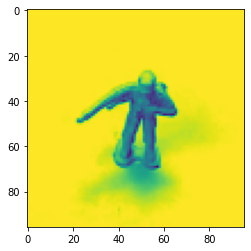

In [11]:
train_images.shape
plt.imshow(train_images[3,:,:,0])

Dado que las imagenes estaban divididas 50 % en train y 50 % en test. Se unen todas las imagenes para dividirlas 70 % en train 15 % en test y 15 % en validación.

In [12]:
# Unir datos
full_images = np.append(train_images, test_images, axis=0)

In [13]:
full_labels = np.append(train_labels, test_labels, axis=0)

In [14]:
full_labels.shape

(48600, 1)

Se tiene $48600$ imágenes de tal modo que $34020$ corresponden a train, $7290$ a test y $7290$ a validación.

In [15]:
# Dividir datos
n_train = round(n_full*0.7) #34020
n_test = round(n_full*0.15) #7290
n_val = n_full - n_test - n_train #7290

# Entrenamiento
train_images = full_images[:n_train,]
train_labels = full_labels[:n_train,]

# Test
test_images = full_images[n_train:n_train+n_test,]
test_labels = full_labels[n_train:n_train+n_test,]

# Validación
val_images = full_images[n_train+n_test:,]
val_labels = full_labels[n_train+n_test:,]

In [16]:
val_images.shape

(7290, 96, 96, 1)

## Base convolucional

En primer lugar, se define la base convolucional usando un patrón común: una pila de capas Conv2D y MaxPooling2D.

Asimismo vale la pena resaltar que una $CNN$ como entrada recibe tensores de tamaño  (altura de la imagen, ancho de la imagen, canales de color de la imagen). Dado que las imagenes se encuentran en escala de verdes se toma como un único canal. 

Finalmente, dado que se quiere clasificar imagenes en 5 clases, la última capa densa será de 5 salidas.

In [17]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(width, height, depth)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [18]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(5))

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 94, 94, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 47, 47, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 45, 45, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 22, 22, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 20, 20, 64)        36928     
                                                                 
 flatten (Flatten)           (None, 25600)             0

## Entrenar el modelo

In [20]:
import keras.backend as K
def precision(y_true, y_pred): #taken from old keras source code
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision
def recall(y_true, y_pred): #taken from old keras source code
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy',recall,precision])

history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(val_images, val_labels))

Epoch 1/10
1064/1064 [==============================] - 26s 13ms/step - loss: 0.3601 - accuracy: 0.8540 - recall: 3.6460 - precision: 7866541.0000 - val_loss: 0.1064 - val_accuracy: 0.9608 - val_recall: 3.8107 - val_precision: 0.7960
Epoch 2/10
1064/1064 [==============================] - 13s 12ms/step - loss: 0.0304 - accuracy: 0.9903 - recall: 3.4834 - precision: 0.7996 - val_loss: 0.0826 - val_accuracy: 0.9698 - val_recall: 3.3929 - val_precision: 0.8064
Epoch 3/10
1064/1064 [==============================] - 15s 14ms/step - loss: 0.0176 - accuracy: 0.9942 - recall: 3.3055 - precision: 0.7999 - val_loss: 0.0368 - val_accuracy: 0.9857 - val_recall: 3.3222 - val_precision: 0.8074
Epoch 4/10
1064/1064 [==============================] - 13s 12ms/step - loss: 0.0141 - accuracy: 0.9956 - recall: 3.2136 - precision: 0.8054 - val_loss: 0.0091 - val_accuracy: 0.9974 - val_recall: 3.1911 - val_precision: 0.7973
Epoch 5/10
1064/1064 [==============================] - 13s 12ms/step - loss: 0.00

228/228 - 2s - loss: 0.0154 - accuracy: 0.9951 - recall: 2.8106 - precision: 0.8161 - 2s/epoch - 7ms/step


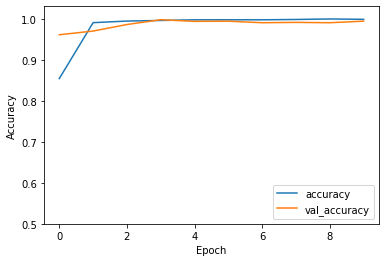

In [21]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1.03])
plt.legend(loc='lower right')
test_loss, test_acc, recall, precision = model.evaluate(test_images,  test_labels, verbose=2)

Las métricas obtenidas fueron las siguientes:

In [36]:
print('Accuracy: ',round(test_acc,3))
print('Recall: ',round(recall,3))
print('Precision: ',round(precision,3,))

Accuracy:  0.995
Recall:  2.811
Precision:  0.816


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


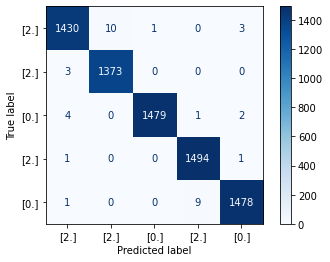

In [34]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
Y_pred = model.predict_generator(test_images)
y_pred = np.argmax(Y_pred, axis=1)
cm = confusion_matrix(test_labels, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=test_labels)
disp.plot(cmap=plt.cm.Blues)
plt.show()

De esta manera, se puede evidenciar que el modelo en la mayoria de las veces clasifica de manera correcta las imagenes en las clases correspondientes.